In [37]:
import  pandas as pd
import numpy as np

In [38]:
detail_df = pd.read_csv("./boss_detail.csv")
detail_df.head()

,encryptJobId,lid,securityId,desc,key_list,url
0,c13aac5712c9115b1Hd52Nu-FlFQ,8FyHWAsO1Bs.search.1,kflFCCdnEmbmv-b1EEYjlZpCJDfK9EI811jals9vBqNicS...,招聘合伙商（创业）\n全程扶持协助开网格站，需要自我投入，自己管理 ，自己做老板，除了一次...,"['物流', '站长']",NaN
1,82637a64e0624e2f03Z_39y-FltT,8FyHWAsO1Bs.search.2,6Sq0K993olmIA-A1ICcCHf0KfrnXdj5UZvyjzk3_B0KHZ-...,岗位职责 :\n1.对负责区域制定配送体验优化方案并有效地执行方案，同时对执行结果进行有效复...,[],NaN
2,8c022a91f966852903V62N60EVZZ,8FyHWAsO1Bs.search.3,mhvT3JuTgMrkS-Y1qsrMZ25OyxiXU-RTGfakwf4BHuVqdS...,岗位职责：\n1. 负责美团众包配送站点的日常管理和运营，确保站点的正常运营和订单配送的及时...,['运营管理'],NaN
3,6c1e57a92b5c1dd503Z_09u6GVNX,8FyHWAsO1Bs.search.4,g5W4NLmJSRVPC-61-x7ng7ddsZofv9JNVMRYzDSH6jLziD...,富锦市城市美团优选网格仓加盟商\n1、开站筹建：负责开站的人员招募、仓库租赁、物资采购、制度...,[],NaN
4,1c4c9d6f07ac0e5f03V60ti7FVBQ,8FyHWAsO1Bs.search.5,tpnTN9CJ-vjnb-N1HKyHNXwJxKxDgH02Y-6COVOVSfxcwL...,岗位介绍\n1，开站筹建：负责开站的人员招募，仓库租赁，物资采购，制度设置等\n2，人员管理...,['物流管理'],NaN


In [55]:
# 小词库
#     - 业务运营：投诉 满意度 效率 方案 异常 
#     - 人员招聘：招聘 新人 开站 招募
#     - 内部管理：考核 激励 排班 出勤 KPI 规划  留存 淘汰
#     - 外部协调：商家 商户 顾客  协同  协调
#     - 人员培训：安全 事故 人身 交通
word_dict={
    "业务运营":["投诉","满意度","效率","方案","异常","运营","业务","体验","复盘","质量"],
    "人员招聘":["招聘","新人","开站","招募","建立","建立"],
    "内部管理":["考核","激励","排班","出勤","KPI","规划","留存","淘汰","管理","制度","指标"],
    "外部协调":["商家","商户","顾客","协同","协调","履约","部门","合作"],
    "人员培训":["安全","事故","人身","交通","培训","教育","学习","技能","知识"]
}

In [56]:
# 切词 加入词典
import jieba
for k,v in word_dict.items():
    jieba.add_word(k)
    for vi in v:
        jieba.add_word(vi)

In [57]:
# 先生成每个都是0的列
for k in word_dict.keys():
    detail_df[k] = 0

In [58]:
# 词频统计 分别统计每个类别中词语出现的次数
import re
# 先对文本去空 英文字符全部大写
for index,row in detail_df.iterrows():
    desc = re.sub(r"\s+","",row["desc"])
    desc = desc.upper()
    seg_list = jieba.cut(desc)
    for word in seg_list:
        for k,v in word_dict.items():
            if word in v:
                detail_df.loc[index,k] = detail_df.loc[index,k] + 1

In [59]:
detail_df.head()

,encryptJobId,lid,securityId,desc,key_list,url,业务运营,人员招聘,内部管理,外部协调,人员培训
0,c13aac5712c9115b1Hd52Nu-FlFQ,8FyHWAsO1Bs.search.1,kflFCCdnEmbmv-b1EEYjlZpCJDfK9EI811jals9vBqNicS...,招聘合伙商（创业）\n全程扶持协助开网格站，需要自我投入，自己管理 ，自己做老板，除了一次...,"['物流', '站长']",NaN,5,4,10,0,0
1,82637a64e0624e2f03Z_39y-FltT,8FyHWAsO1Bs.search.2,6Sq0K993olmIA-A1ICcCHf0KfrnXdj5UZvyjzk3_B0KHZ-...,岗位职责 :\n1.对负责区域制定配送体验优化方案并有效地执行方案，同时对执行结果进行有效复...,[],NaN,9,1,4,5,3
2,8c022a91f966852903V62N60EVZZ,8FyHWAsO1Bs.search.3,mhvT3JuTgMrkS-Y1qsrMZ25OyxiXU-RTGfakwf4BHuVqdS...,岗位职责：\n1. 负责美团众包配送站点的日常管理和运营，确保站点的正常运营和订单配送的及时...,['运营管理'],NaN,6,1,6,1,1
3,6c1e57a92b5c1dd503Z_09u6GVNX,8FyHWAsO1Bs.search.4,g5W4NLmJSRVPC-61-x7ng7ddsZofv9JNVMRYzDSH6jLziD...,富锦市城市美团优选网格仓加盟商\n1、开站筹建：负责开站的人员招募、仓库租赁、物资采购、制度...,[],NaN,4,3,13,0,1
4,1c4c9d6f07ac0e5f03V60ti7FVBQ,8FyHWAsO1Bs.search.5,tpnTN9CJ-vjnb-N1HKyHNXwJxKxDgH02Y-6COVOVSfxcwL...,岗位介绍\n1，开站筹建：负责开站的人员招募，仓库租赁，物资采购，制度设置等\n2，人员管理...,['物流管理'],NaN,4,3,15,0,0


In [60]:
# 化雷达图 分析不各类为0的占比
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"]="SimHei"
matplotlib.rcParams["axes.unicode_minus"]=False

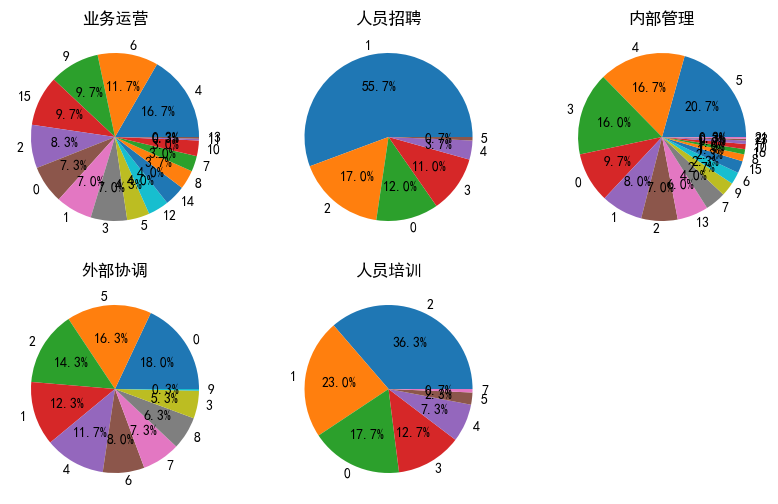

In [61]:
plt.figure(figsize=(10,6))
for i,k in enumerate(word_dict.keys()):
    plt.subplot(2,3,i+1)
    data = detail_df[k].value_counts()
    plt.pie(data,labels=data.index,autopct="%1.1f%%")
    plt.title(k)

In [70]:

# 计算不为0的占比
for i, k in enumerate(word_dict.keys()):
    score = detail_df[detail_df[k] > 1].shape[0] / detail_df.shape[0]  # 闭合数据
    print(k, score)


业务运营 0.8566666666666667
人员招聘 0.3233333333333333
内部管理 0.8233333333333334
外部协调 0.6966666666666667
人员培训 0.5933333333333334


C:\Users\JimmySmile\AppData\Local\Temp\ipykernel_29320\1264420733.py:15: MatplotlibDeprecationWarning: Passing label as a length 5 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(angles, scores, linewidth=2, label=keys)


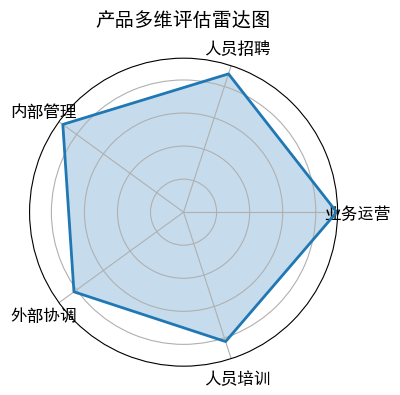

In [76]:
# 雷达图 计算不为0的占比
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, polar=True)  # 极坐标系
angles = np.linspace(0, 2 * np.pi, len(word_dict), endpoint=False).tolist()
angles += angles[:1]
  # 闭合图形
scores = []
# 绘制每个产品的数据
for i,k in enumerate(word_dict.keys()):
    score =detail_df[detail_df[k] > 0].shape[0] / detail_df.shape[0] # 闭合数据
    scores.append(score)
scores += scores[:1]
keys = list(word_dict.keys())
# keys = keys[1:]+keys[:1]
ax.plot(angles, scores, linewidth=2, label=keys)
ax.fill(angles, scores, alpha=0.25)

# 设置角度刻度标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(keys, fontsize=12)

# 设置径向刻度（0-1）
# ax.set_rlabel_position(20)
# plt.ylim(0, 1)
# 删除镜像刻度
ax.set_yticklabels([])

# 添加标题和图例
plt.title('产品多维评估雷达图', fontsize=14, pad=10)

plt.show()

In [72]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

In [73]:
scores

[0.9266666666666666,
 0.88,
 0.9033333333333333,
 0.82,
 0.8233333333333334,
 0.9266666666666666]

TypeError: 'dict_keys' object is not subscriptable